In [ ]:
import math
import matplotlib as plt
import numpy as np
import copy

# Q1

### (a) Power method

In [89]:
e = 0.001 
x0 = [1,1,1,1]

A=[[4,0.66667,-1.33333,1.33333],[0.66667,4,0,0],[-1.33333,0,6,2],[1.33333,0,2,6]]
evalue, evec, k = find(A,x0,y,e) 
print("Dominant evalue =", evalue)
print("Corresponding normalised eigenvector =", evec)
print("No of iterations = ",k)

Dominant evalue = 7.997183437654075
Corresponding normalised eigenvector = [0.0011211801121248828, 0.000374028905566834, 0.7063585144639625, 0.7078532701780773]
No of iterations =  3


### (b) QR factorisation method

In [91]:
A=np.array([[4,0.66667,-1.33333,1.33333],[0.66667,4,0,0],[-1.33333,0,6,2],[1.33333,0,2,6]])

eigenvalues = find_eigenvalues(A)
print("Eigenvalues found using QR Factorisation:", eigenvalues)

Eigenvalues found using QR Factorisation: [5.999997, 4.0, 8.0, 2.000003]


# Q2

### Using cubic least square fitting

Coefficients [0.5746586674196053, 4.725861442141991, -11.128217777643158, 7.668677622909172]


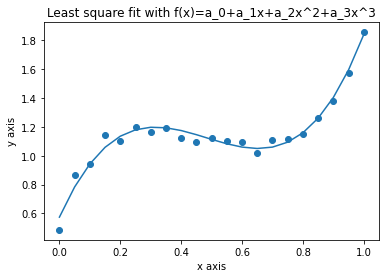

[[1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00]
 [1.00000e+00 5.00000e-02 2.50000e-03 1.25000e-04]
 [1.00000e+00 1.00000e-01 1.00000e-02 1.00000e-03]
 [1.00000e+00 1.50000e-01 2.25000e-02 3.37500e-03]
 [1.00000e+00 2.00000e-01 4.00000e-02 8.00000e-03]
 [1.00000e+00 2.50000e-01 6.25000e-02 1.56250e-02]
 [1.00000e+00 3.00000e-01 9.00000e-02 2.70000e-02]
 [1.00000e+00 3.50000e-01 1.22500e-01 4.28750e-02]
 [1.00000e+00 4.00000e-01 1.60000e-01 6.40000e-02]
 [1.00000e+00 4.50000e-01 2.02500e-01 9.11250e-02]
 [1.00000e+00 5.00000e-01 2.50000e-01 1.25000e-01]
 [1.00000e+00 5.50000e-01 3.02500e-01 1.66375e-01]
 [1.00000e+00 6.00000e-01 3.60000e-01 2.16000e-01]
 [1.00000e+00 6.50000e-01 4.22500e-01 2.74625e-01]
 [1.00000e+00 7.00000e-01 4.90000e-01 3.43000e-01]
 [1.00000e+00 7.50000e-01 5.62500e-01 4.21875e-01]
 [1.00000e+00 8.00000e-01 6.40000e-01 5.12000e-01]
 [1.00000e+00 8.50000e-01 7.22500e-01 6.14125e-01]
 [1.00000e+00 9.00000e-01 8.10000e-01 7.29000e-01]
 [1.00000e+00 9.50000e-01 9.025

In [79]:
f=open('assign3fit.txt','r')
l=[[float(num) for num in line.split(' ')] for line in f]
weights_cubic = LeastSquareFit(l)
l = np.array(l)

X_cubic = np.column_stack([np.ones(len(l[:,0])), l[:,0], np.power(l[:,0], 2), np.power(l[:,0], 3)])

cond_num_cubic = np.linalg.norm(np.linalg.inv(X_cubic.T.dot(X_cubic)), np.inf) * np.linalg.norm(X_cubic, np.inf)

### Fitting data using modified chebyshev functions

Coeffecients: [1.1609694790335525, 0.39351446798815237, 0.04684983209010658, 0.23964617571596986]


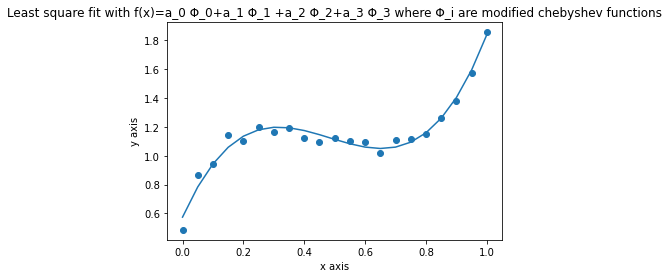

Condition number for cubic square fit: 1989.7834177013765
Condition number for fit using chebyshev polynomials: 0.7215007215007221
A lower condition number indicates better numerical stability. It suggests that small changes in the input data (e.g., measurement errors) will result in only small changes in the fitted parameters.Conversely, a higher condition number indicates poorer numerical stability. In this case, small changes in the input data can lead to significant changes in the fitted parameters, which may result in overfitting or underfitting.
The fit using chebyshev polynomials as basis gives a much better fit than a cubic polynomial


In [86]:
a, A_cheby = fit_chebyshev(l,3)
print("Coeffecients:",a)

x,y=[],[]
for i in range(len(l)):
    x.append(l[i][0])
    y.append(l[i][1])
plt.scatter(x,y)

x, y = [], []
for i in range(len(l)):
    sum=0
    for j in range(len(a)):
        sum += (a[j])*(chebyshev(l[i][0],j))
    y.append(sum)
    x.append(l[i][0])
        
plt.plot(x,y)
plt.title("Least square fit with f(x)=a_0 Φ_0+a_1 Φ_1 +a_2 Φ_2+a_3 Φ_3 where Φ_i are modified chebyshev functions")
plt.ylabel("y axis")
plt.xlabel("x axis")
plt.show()

X_cheby = np.column_stack([chebyshev(l[:,0], i) for i in range(4)])

cond_num_cheby = np.linalg.norm(np.linalg.inv(X_cheby.T.dot(X_cheby)), np.inf) * np.linalg.norm(X_cheby, np.inf)

print("Condition number for cubic square fit:", cond_num_cubic)
print("Condition number for fit using chebyshev polynomials:", cond_num_cheby)

print("A lower condition number indicates better numerical stability. It suggests that small changes in the input data (e.g., measurement errors) will result in only small changes in the fitted parameters.Conversely, a higher condition number indicates poorer numerical stability. In this case, small changes in the input data can lead to significant changes in the fitted parameters, which may result in overfitting or underfitting.")
print("The fit using chebyshev polynomials as basis gives a much better fit than a cubic polynomial.")